In [1]:
import display
import hopfield_net
import read_csv
import noise
import numpy as np

np.random.seed(0)

In [2]:
patterns, dims = read_csv.read_patterns('./../data/hopfield/large-25x25.csv')
num_of_patterns = patterns.shape[0]

## Test dla zaszumionego wzorca
Zaszumimy wzorzec, a następnie sprawdzimy czy sieć zdoła go odtworzyć

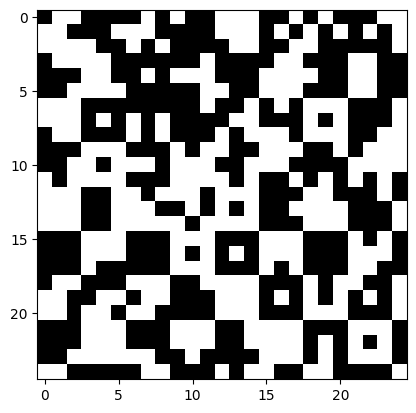

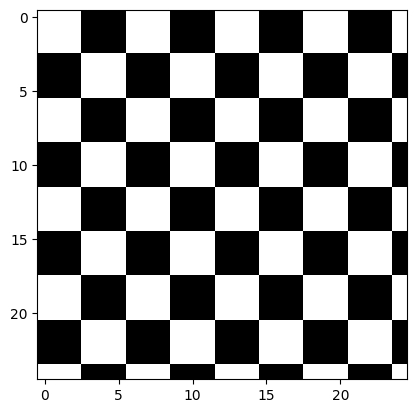

In [3]:
noised_patterns = np.array([noise.noise(pattern, 0.2) for pattern in patterns])
display.display(noised_patterns[2], dims)
display.display(patterns[2], dims)

In [6]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']



n = dims[0] * dims[1]
# learning method 0 - Hebb, 1 - Oja (not implemented)
method = 0
# activation function 0 - signum, 1 - heaviside
activation = 0
# dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 1

HN = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)

HN.HEBB_training(patterns)

## Sprawdźmy, jak sieć poradzi sobie z zaszumionym wzorcem
Jak widać sieć doskonale oddtworzyła szachownicę

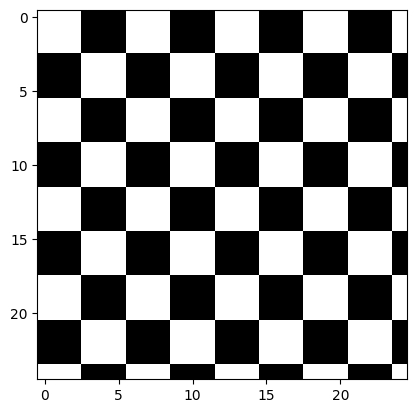

In [9]:
predict = HN.forward(dims, noised_patterns[2], epochs = 2)
display.display(predict, dims)

## A co z domkiem?
Sprawdźmy, jak sieć poradzi sobie z zaszumionym obrazem domku.
Animacja z tego procesu jest zapisana jako animation1.gif.
Sieć błędnie klasyfikuje domek, a w dodatku nie zbiega do żadnego wzorca uczącego,
jednakże w trakcie działania widać przedziwne zachowanie sieci 
(już się wydaje, że zbieżność nastąpi do obrazku domku, ale tak się nie dzieje).

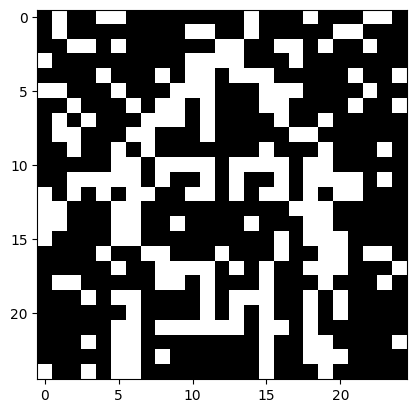

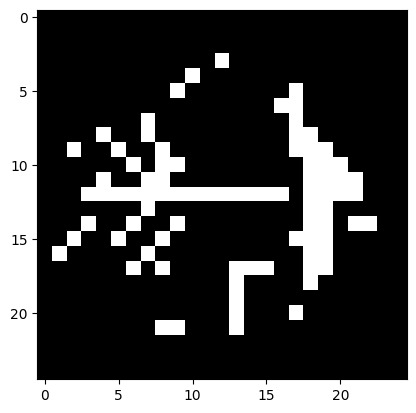

In [13]:
idx = 1
init_x = noised_patterns[idx]
display.display(noised_patterns[idx], dims)
predict_x = HN.forward(dims, init_x = init_x, epochs = 5, animation = True)
display.display(predict_x, dims)

## Literki
Dalej zajmiemy się literkami, jak widzimy przy poziomie zaszumienia 0.2 sieć doskonale sobie radzi, zaś animacja tego procesu została zapisana pod nazwą animation2.gif.

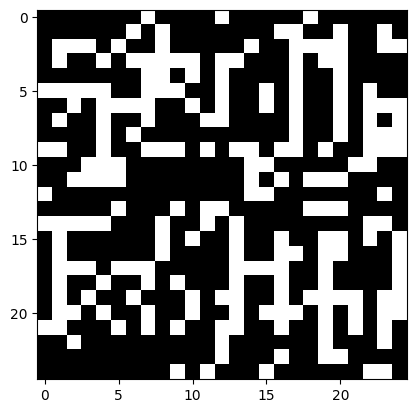

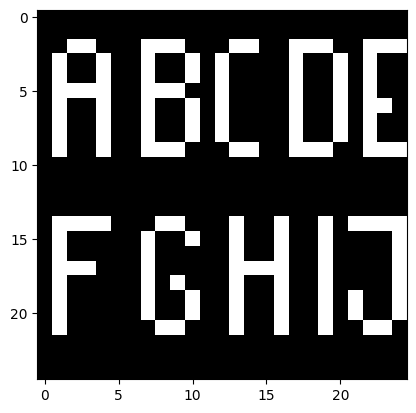

In [25]:
idx = 5
display.display(noised_patterns[idx], dims)
predict_x = HN.forward(dims, init_x = noised_patterns[idx], epochs = 5, animation = True)
display.display(predict_x, dims)

## Zwiększmy poziom szumu
Jak widać poniżej, po zwiększeniu szumu do poziomu 0.3 sieć nie zbiega do literek, zaś do pewnego atraktora,
którego nie było we wzorcach uczących. Co ciekawe, wzorzec ten posiada wiele pionowych linii, co najpewniej jest spowodowane wzorcem numer 4 (przedstawiony na samym dole). Animację tego procesu zapisaliśmy pod nazwą animation3.gif.

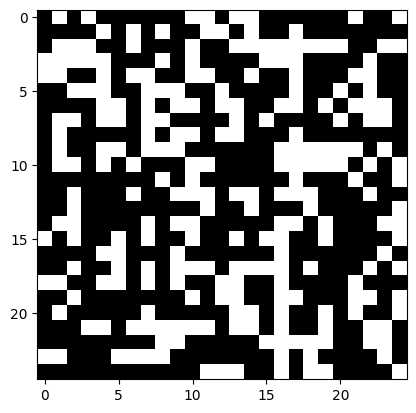

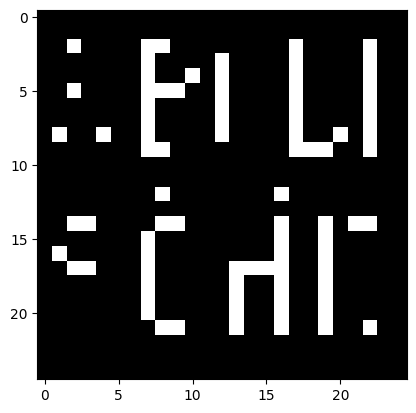

In [27]:
noised_letters = noise.noise(patterns[5], 0.3)
display.display(noised_letters, dims)
predict_x = HN.forward(dims, init_x = noised_letters, epochs = 5, animation = True)
display.display(predict_x, dims)

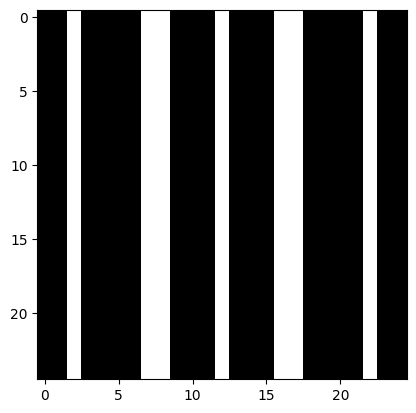

In [26]:
display.display(patterns[4], dims)